#Pre-Processing of Data 

The following code takes the excel sheets for the ruhlman abstract data and student response data, and saves the stemmed words and the number of occurences to json files. 

In [5]:
import seaborn as sns
import pandas as pd

In [6]:
di = {'Dept': ['Econ', 'Econ', 'CS', 'CS'], 'Num': [3, 4, 5, 6], 'Ruhl': [1,0, 1, 0]}

In [7]:
di

{'Dept': ['Econ', 'Econ', 'CS', 'CS'],
 'Num': [3, 4, 5, 6],
 'Ruhl': [1, 0, 1, 0]}

In [8]:
df = pd.DataFrame(di)

In [9]:
df

,Dept,Num,Ruhl
0,Econ,3,1
1,Econ,4,0
2,CS,5,1
3,CS,6,0


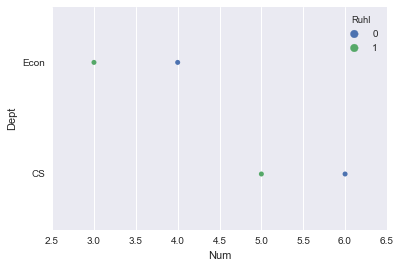

In [10]:
%matplotlib inline
sns.stripplot(x = 'Num', y = 'Dept', hue = 'Ruhl', data = df)

In [11]:
responses = pd.read_excel('responses.xlsx')

In [12]:
responses.columns = ['Timestamp', 'Major1', 'Desc1', 'Major2', 'Desc2']

In [13]:
responses

,Timestamp,Major1,Desc1,Major2,Desc2
0,2016-05-06 17:11:31.065,Biology,"Study! Eat dinner in Bates, take a thousand la...",Computer Science/MAS,"Code all the time, never sleep, are geniuses."
1,2016-05-06 20:04:55.880,Biology,"A lot of memorization, but also a lot of probl...",English,"A lot of papers, and analysis and a lot of rea..."
2,2016-05-06 17:57:51.681,Biology,Learn about cells and organisms. Probably invo...,Political Science,Study political systems around the world (hist...
3,2016-05-05 18:17:48.775,Biology,They have lab all the time and basically live ...,Psychology,They study children at the Child Study Center ...
4,2016-05-06 16:05:29.375,Biology,"Go to lectures that teach them facts, informat...",Psychology,Study fundamental psychological theory as basi...
5,2016-05-05 17:48:25.710,Biology,"Alot of memorization, experiments, and lab rep...",Women's and Gender Studies,"Alot of heated, angry debate & looking at issu..."
6,2016-05-07 12:35:28.908,Biology,"read books, talk about them, write papers, tal...",NaN,NaN
7,2016-05-07 20:48:52.308,Biology,I think a lot of the students in this dept. me...,NaN,NaN
8,2016-05-05 16:28:16.981,Computer Science/MAS,I think CS/MAS students learn about computer s...,Biology,I think students in this major learn about a l...
9,2016-05-05 18:01:16.725,Computer Science/MAS,A lot of problem sets. Coding websites. Data s...,Biology,Lab. Looking at animals. Probably also problem...


In [14]:
def combine_responses(df):
    df1 = responses[['Major1', 'Desc1']]
    df1 = df1.reset_index(drop = True)
    df1.columns = ['Department', 'Description']
    df2 = responses[['Major2', 'Desc2']]
    #df2 = df2.reset_index(drop = True)
    df2.columns = ['Department', 'Description']
    
    df2.index = list(range(len(df1), len(df1)+len(df2)))
    fr = [df1, df2]
    return pd.concat(fr)
    

In [15]:
#df1 = responses.iloc(['Major1', 'Desc1'])
df1 = responses[['Major1', 'Desc1']]

In [16]:
df = combine_responses(responses)

In [17]:
df

,Department,Description
0,Biology,"Study! Eat dinner in Bates, take a thousand la..."
1,Biology,"A lot of memorization, but also a lot of probl..."
2,Biology,Learn about cells and organisms. Probably invo...
3,Biology,They have lab all the time and basically live ...
4,Biology,"Go to lectures that teach them facts, informat..."
5,Biology,"Alot of memorization, experiments, and lab rep..."
6,Biology,"read books, talk about them, write papers, tal..."
7,Biology,I think a lot of the students in this dept. me...
8,Computer Science/MAS,I think CS/MAS students learn about computer s...
9,Computer Science/MAS,A lot of problem sets. Coding websites. Data s...


In [18]:
df = df.dropna()

In [19]:
len(df)

160

In [20]:
bio = df[df['Department'] == 'Biology']
eng = df[df['Department'] == 'English']
psych = df[df['Department'] == 'Psychology']
art = df[df['Department'] == 'Studio Art/Art History']
econ = df[df['Department'] == 'Economics']
soc = df[df['Department'] == 'Sociology']
cs = df[df['Department'] == 'Computer Science/MAS']
wom = df[df['Department'] == 'Women\'s and Gender Studies']
pol = df[df['Department'] == 'Political Science']
mus = df[df['Department'] == 'Music']
hist = df[df['Department'] == 'History']

In [21]:
print(len(bio))
print(len(eng))
print(len(psych))
print(len(art))
print(len(econ))
print(len(soc))
print(len(cs))
print(len(wom))
print(len(pol))
print(len(mus))
print(len(hist))

19
21
9
22
10
15
21
14
11
15
3


In [22]:
def cleanAbstract(abs):
    if type(abs) == str:
        abs.replace('[', '')
        abs.replace('"', '')
        abs.replace(',', '')
        abs.replace('.', '')
        abs.replace('!', '')
        abs.replace('?', '')
        abs = abs.strip()
        abs = abs[2:len(abs)-2]
        return abs
    else:
        return ""
'''
fuction to get how many words per 100 word from that department
'''
import nltk
from collections import Counter
def word_frequency(df):
    #df['Description'] = df['Description'].apply(lambda x: cleanAbstract(x))
    allDesc = " ".join(df.Description)
    allDesc = allDesc.replace('[', '')
    allDesc = allDesc.replace('(', '')
    allDesc = allDesc.replace(')', '')
    allDesc = allDesc.replace('"', '')
    allDesc = allDesc.replace(',', '')
    allDesc = allDesc.replace('.', '')
    allDesc = allDesc.replace('!', '')
    allDesc = allDesc.replace('?', '')
    allDesc = allDesc.strip()
    allDesc = allDesc[2:len(allDesc)-2]
    english_stemmer = nltk.stem.SnowballStemmer('english')
    #print(allDesc.split())
    spl = allDesc.split()
    for i in range(len(spl)):
        spl[i] = english_stemmer.stem(spl[i])
    
    #print(map(english_stemmer.stem, allDesc.split()))
    #return stemmed_words
    dic = dict(Counter(spl))
    dic['total_words'] = len(spl)
    return dic

In [23]:
biodict = word_frequency(bio)

In [24]:
biodict

{'-': 1,
 '--': 1,
 '200-level': 1,
 'a': 19,
 'about': 8,
 'academia': 1,
 'actual': 1,
 'addit': 1,
 'all': 3,
 'alot': 1,
 'also': 6,
 'although': 1,
 'amount': 1,
 'analyz': 1,
 'anatomi': 1,
 'and': 27,
 'anim': 3,
 'are': 4,
 "aren't": 1,
 'around': 1,
 'as': 6,
 'at': 3,
 'attend': 1,
 'bacteria': 1,
 'basic': 1,
 'bate': 1,
 'be': 1,
 'becaus': 2,
 'bio': 4,
 'bio-chem': 1,
 'biolog': 7,
 'blood': 1,
 'book': 1,
 'but': 2,
 'campus': 1,
 'cell': 7,
 'cellular': 1,
 'center': 2,
 'certain': 1,
 'chem': 1,
 'chemistri': 3,
 'cissex': 1,
 'class': 4,
 'classism': 1,
 'coloni': 1,
 'connect': 2,
 'cool': 1,
 'coupl': 1,
 'cours': 2,
 'coursework': 1,
 'cover': 1,
 'critic': 1,
 'data': 1,
 'depart': 2,
 'dept': 1,
 'design': 1,
 'differ': 1,
 'dinner': 1,
 'dissect': 1,
 'do': 6,
 'doe': 1,
 'easier': 1,
 'eat': 1,
 'ecosystem': 1,
 'educ': 1,
 'eg': 2,
 'els': 1,
 'endless': 1,
 'energi': 1,
 'enough': 1,
 'etc': 1,
 'ever': 1,
 'everi': 1,
 'exampl': 1,
 'exist': 1,
 'experi': 4,

In [25]:
import json
with open('bio.json', 'w') as fp:
    json.dump(biodict, fp)

In [26]:
with open('bio.json', 'r') as fp:
    bio_load = json.load(fp)

In [27]:
bio_load['academia']

1

In [28]:
engdict = word_frequency(eng)
with open('eng.json', 'w') as fp:
    json.dump(engdict, fp)

In [29]:
psychdict = word_frequency(psych)
with open('psych.json', 'w') as fp:
    json.dump(psychdict, fp)

In [30]:
artdict = word_frequency(art)
with open('art.json', 'w') as fp:
    json.dump(artdict, fp)

In [31]:
econdict = word_frequency(econ)
with open('econ.json', 'w') as fp:
    json.dump(econdict, fp)

In [32]:
socdict = word_frequency(soc)
with open('soc.json', 'w') as fp:
    json.dump(socdict, fp)

In [33]:
csdict = word_frequency(cs)
with open('cs.json', 'w') as fp:
    json.dump(csdict, fp)

In [34]:
womdict = word_frequency(wom)
with open('wom.json', 'w') as fp:
    json.dump(womdict, fp)

In [35]:
poldict = word_frequency(pol)
with open('pol.json', 'w') as fp:
    json.dump(poldict, fp)

In [36]:
musdict = word_frequency(mus)
with open('mus.json', 'w') as fp:
    json.dump(musdict, fp)

In [37]:
histdict = word_frequency(hist)
with open('hist.json', 'w') as fp:
    json.dump(histdict, fp)

In [38]:
ruhl = pd.read_excel('ruhlman.xlsx')

In [39]:
ruhl.head()

,Year,Title,Students,Advisor,Abstract,Student_Year,Student_Major,Advisor_Major
0,1997,"""King Lear"" Through Film: Brook and Kozintsev",Alexandra Parsons,Yu Jin Ko,"The final scene of Shakespeare's ""King Lear"" p...",1997,Unspecified,English
1,1997,The Grotesque Nature of Paradise in Milton's P...,Elizabeth Reich,Jody Mikalachki,In The Interpretacion of Dreams Freud writes t...,1997,Unspecified,English
2,1997,"Eliminating Stereotypes, Identifying Confoundi...",Aimee Jabro-Young,Paul Wink,This study compared differences in political b...,1998,Unspecified,Psychology
3,1997,The Art of Hatred: The Representation of Jewis...,Inna Kantor,Frances Malino,During much of the nineteenth century. Europea...,1997,Unspecified,Jewish Studies
4,1997,"The Problems of, and Possibilities for, Norweg...",Ingrid Moen,Barbara Geller,The goal of my talk is to outline the ways in ...,1997,Unspecified,Religion


In [40]:

def get_sub(word):
    dfs = ruhl[ruhl['Student_Major'].str.contains(word)]
    dfa = dfs[dfs['Advisor_Major'].str.contains(word)]
    return dfa

In [41]:
ruhl = ruhl.fillna('')
ruhlbio = get_sub('Biolo')

In [42]:
ruhlbio

,Year,Title,Students,Advisor,Abstract,Student_Year,Student_Major,Advisor_Major
88,1998,Leaf Senescence in the Sugar Maple,"Cara Attanucci, Julia Barnard, Erica Larschan,...","Gary Harris and Martina Koniger, Biological S...",In September and October 1997 a field study wa...,"1998, 1998, 1998, 1998, 1998, 1998","Biochemistry, Biological Sciences, Biochemistr...",Biological Sciences
93,1998,"Maintenance of Social Groups in a Matriarchal,...",Jakobina Arch,"Nick Rodenhouse, Biological Sciences",The study of grouping tendencies is a basic co...,1998,Biological Sciences and Medieval and Renaissan...,Biological Sciences
115,1998,Urban Light Pollution Alters the Diel Vertical...,"Hannah Walsh, Stephanie Pierce","Marianne Moore, Biological Sciences",Zooplankton in both freshwater and marine ecos...,"1999, 1998","Biological Sciences, Biological Sciences",Biological Sciences
116,1998,The Effects of Wastewater Irrigation on the Qu...,Sophie Parker,"Marianne Moore, Biological Sciences",Soil quality was studied in forest plots irrig...,1999,Biological Sciences,Biological Sciences
117,1998,Differential Protein Expression Induced by Hea...,Keren Lisa Witkin,"Mary Allen, Biological Sciences",Expression of heat shock proteins was induced ...,1998,Biological Sciences,Biological Sciences
118,1998,"The Effects of Growth Medium, Breaking Buffers...",Kyung Hee Yi,"Mary Allen, Biological Sciences",The specific activities of the enzyme exopolyp...,1998,Biological Chemistry,Biological Sciences
120,1998,Analysis of a gfp-fliN Gene Fusion and its Inc...,K. Nicole Clouse,"Drew Webb, Biology",The bacterium Escherichia coli swims by rotati...,1998,Biological Chemistry,Biological Sciences
141,1998,Do Menstrual Hormones Influence the Circadian ...,Yoo-Lee Yea,"Mary D. Coyne, Biological Sciences",Core body temperature (CBT) is a summation of ...,1998,Biological Sciences,Biological Sciences
144,1998,The Effect of Aging on Memory and Acetylcholin...,Laurie Ann Burlingame,"Joanne Berger-Sweeney, Biological Sciences",We used a commonly tested strain of laboratory...,1999,Biological Sciences and Psychology,Biological Sciences
153,1998,Predicting Swimming Styles of Cetaceans Using ...,Adrienne Elena McKee,"Emily Buchholtz, Biological Sciences",Cetaceans propel themselves via undulation of ...,1998,Biological Sciences,Biological Sciences


In [43]:
ruhlbio = get_sub('Biolo')
ruhleng = get_sub('English')
ruhlpsych = get_sub('Psych')
ruhlart = get_sub('Art')
ruhlecon = get_sub('Economic')
ruhlsoc = get_sub('Socio')
ruhlcs = get_sub('Computer')
ruhlwom = get_sub('Women')
ruhlpol = get_sub('Politic')
ruhlmus = get_sub('Music')
ruhlhist = get_sub('Histor')

In [44]:
def word_frequency_ruhl(df):
    #df['Description'] = df['Description'].apply(lambda x: cleanAbstract(x))
    allDesc = " ".join(df.Abstract)
    allDesc = allDesc.replace('[', '')
    allDesc = allDesc.replace('(', '')
    allDesc = allDesc.replace(')', '')
    allDesc = allDesc.replace('"', '')
    allDesc = allDesc.replace(',', '')
    allDesc = allDesc.replace('.', '')
    allDesc = allDesc.replace('!', '')
    allDesc = allDesc.replace('?', '')
    allDesc = allDesc.strip()
    allDesc = allDesc[2:len(allDesc)-2]
    english_stemmer = nltk.stem.SnowballStemmer('english')
    #print(allDesc.split())
    spl = allDesc.split()
    for i in range(len(spl)):
        spl[i] = english_stemmer.stem(spl[i])
    
    #print(map(english_stemmer.stem, allDesc.split()))
    #return stemmed_words
    dic = dict(Counter(spl))
    dic['total_words'] = len(spl)
    return dic

def total_words(df):
    allDesc = " ".join(df.Abstract)
    return len(allDesc.split())

In [45]:
biodictruhl = word_frequency_ruhl(ruhlbio)
biototalruhl = total_words(ruhlbio)
with open('ruhlbio.json', 'w') as fp:
    json.dump(biodictruhl, fp)

In [46]:
biodictruhl

{'distinguish': 3,
 'microfila': 1,
 'brdu': 1,
 'it': 90,
 'cytokinesi': 3,
 'receptor': 6,
 'effort': 5,
 'employ': 7,
 'medium': 17,
 'visual': 3,
 'ectop': 1,
 'edgerton': 1,
 '=': 3,
 'solubl': 3,
 'dynam': 7,
 'size': 26,
 'half': 1,
 'epiderm': 2,
 'tree-fal': 2,
 'convent': 2,
 'divis': 15,
 'conglomer': 1,
 'tf': 2,
 'dioxid': 2,
 'past': 2,
 'webb': 1,
 'of': 1178,
 'versus': 3,
 'pi-3-p': 1,
 'endem': 15,
 'decarboxylas': 8,
 'robert': 2,
 'doe': 4,
 'biosynthet': 1,
 'voyag': 1,
 'allow': 21,
 'forest': 15,
 'research': 166,
 'usual': 4,
 'schiff': 7,
 'oxidas': 1,
 '94': 1,
 'spectrogram': 1,
 'clb2/cdc28': 1,
 'nir': 1,
 'signal': 34,
 'incept': 1,
 'sort': 1,
 'differenti': 20,
 'estuarine/marin': 1,
 '60': 1,
 'brook': 3,
 'shrimp': 1,
 'dimension': 2,
 'karen': 1,
 'conni': 1,
 'qpcr': 1,
 'we': 157,
 'flin': 4,
 'th': 1,
 '160ë_g/ml': 1,
 'outer': 1,
 'spectroscopi': 27,
 'young': 5,
 'intracellular': 11,
 'invok': 1,
 'lenta': 1,
 'innov': 2,
 'cricket': 2,
 'fatti':

In [47]:
engdictruhl = word_frequency_ruhl(ruhleng)
with open('ruhleng.json', 'w') as fp:
    json.dump(engdictruhl, fp)

In [48]:
psychdictruhl = word_frequency_ruhl(ruhlpsych)
with open('ruhlpsych.json', 'w') as fp:
    json.dump(psychdictruhl, fp)

In [49]:
artdictruhl = word_frequency_ruhl(ruhlart)
with open('ruhlart.json', 'w') as fp:
    json.dump(artdictruhl, fp)

In [50]:
econdictruhl = word_frequency_ruhl(ruhlecon)
with open('ruhlecon.json', 'w') as fp:
    json.dump(econdictruhl, fp)

In [51]:
socdictruhl = word_frequency_ruhl(ruhlsoc)
with open('ruhlsoc.json', 'w') as fp:
    json.dump(socdictruhl, fp)

In [52]:
csdictruhl = word_frequency_ruhl(ruhlcs)
with open('ruhlcs.json', 'w') as fp:
    json.dump(csdictruhl, fp)

In [53]:
womdictruhl = word_frequency_ruhl(ruhlwom)
with open('ruhlwom.json', 'w') as fp:
    json.dump(womdictruhl, fp)

In [54]:
poldictruhl = word_frequency_ruhl(ruhlpol)
with open('ruhlpol.json', 'w') as fp:
    json.dump(poldictruhl, fp)

In [55]:
musdictruhl = word_frequency_ruhl(ruhlmus)
with open('ruhlmus.json', 'w') as fp:
    json.dump(musdictruhl, fp)

In [56]:
histdictruhl = word_frequency_ruhl(ruhlhist)
with open('ruhlhist.json', 'w') as fp:
    json.dump(histdictruhl, fp)

In [57]:
if 'dfasf' in histdictruhl.keys():
    print('sf')

In [58]:
def construct_query(wordraw):
    english_stemmer = nltk.stem.SnowballStemmer('english')
    word = english_stemmer.stem(wordraw)
    if word in biodict.keys():
        bioresp = biodict[word] / biodict['total_words'] * 100
    else:
        bioresp = 0
    if word in biodictruhl.keys():
        bioruhl = biodictruhl[word] / biodictruhl['total_words'] * 100
    else:
        bioruhl = 0
        
    if word in engdict.keys():
        engresp = engdict[word] / engdict['total_words'] * 100
    else:
        engresp = 0
    if word in engdictruhl.keys():
        engruhl = engdictruhl[word] / engdictruhl['total_words'] * 100
    else:
        engruhl = 0
    
    if word in psychdict.keys():
        psychresp = psychdict[word] / psychdict['total_words'] * 100
    else:
        psychresp = 0
    if word in psychdictruhl.keys():
        psychruhl = psychdictruhl[word] / psychdictruhl['total_words'] * 100
    else:
        psychruhl = 0
        
    if word in artdict.keys():
        artresp = artdict[word] / artdict['total_words'] * 100
    else:
        artresp = 0
    if word in artdictruhl.keys():
        artruhl = artdictruhl[word] / artdictruhl['total_words'] * 100
    else:
        artruhl = 0
    
    if word in econdict.keys():
        econresp = econdict[word] / econdict['total_words'] * 100
    else:
        econresp = 0
    if word in econdictruhl.keys():
        econruhl = econdictruhl[word] / econdictruhl['total_words'] * 100
    else:
        econruhl = 0
        
    if word in socdict.keys():
        socresp = socdict[word] / socdict['total_words'] * 100
    else:
        socresp = 0
    if word in socdictruhl.keys():
        socruhl = socdictruhl[word] / socdictruhl['total_words'] * 100
    else:
        socruhl = 0
        
    if word in csdict.keys():
        csresp = csdict[word] / csdict['total_words'] * 100
    else:
        csresp = 0
    if word in csdictruhl.keys():
        csruhl = csdictruhl[word] / csdictruhl['total_words'] * 100
    else:
        csruhl = 0
        
    if word in womdict.keys():
        womresp = womdict[word] / womdict['total_words'] * 100
    else:
        womresp = 0
    if word in womdictruhl.keys():
        womruhl = womdictruhl[word] / womdictruhl['total_words'] * 100
    else:
        womruhl = 0
    
    if word in poldict.keys():
        polresp = poldict[word] / poldict['total_words'] * 100
    else:
        polresp = 0
    if word in poldictruhl.keys():
        polruhl = poldictruhl[word] / poldictruhl['total_words'] * 100
    else:
        polruhl = 0
        
    if word in musdict.keys():
        musresp = musdict[word] / musdict['total_words'] * 100
    else:
        musresp = 0
    if word in musdictruhl.keys():
        musruhl = musdictruhl[word] / musdictruhl['total_words'] * 100
    else:
        musruhl = 0
        
    if word in histdict.keys():
        histresp = histdict[word] / histdict['total_words'] * 100
    else:
        histresp = 0
    if word in histdictruhl.keys():
        histruhl = histdictruhl[word] / histdictruhl['total_words'] * 100
    else:
        histruhl = 0
        
    return pd.DataFrame({'Department': ['Biology','Biology', 'English', 'English', 'Psychology', 'Psychology',
                                       'Economics', 'Economics', 'Art', 'Art', 'Sociology', 'Sociology',
                                       'Computer Science', 'Computer Science','Women and Gender Studies', 
                                       'Women and Gender Studies','Political Science', 'Political Science',
                                       'Music', 'Music','History', 'History'], 
                        'Number' : [bioresp, bioruhl, engresp, engruhl, psychresp, psychruhl, econresp, econruhl, artresp,
                                   artruhl, socresp, socruhl, csresp, csruhl, womresp, womruhl, polresp, polruhl, musresp, 
                                   musruhl, histresp, histruhl],
                        'Ruhlman' :[False, True, False, True, False, True, False, True, False, True, False, True, False,
                                    True, False, True, False, True, False, True, False, True,]}
                       )

In [59]:
animal = construct_query('equality')


In [60]:
animal

,Department,Number,Ruhlman
0,Biology,0.000000,False
1,Biology,0.000000,True
2,English,0.000000,False
3,English,0.009602,True
4,Psychology,0.000000,False
5,Psychology,0.019110,True
6,Economics,0.000000,False
7,Economics,0.011651,True
8,Art,0.000000,False
9,Art,0.005373,True


In [61]:
animal.sort_values(['Number'], ascending = False, inplace = True)

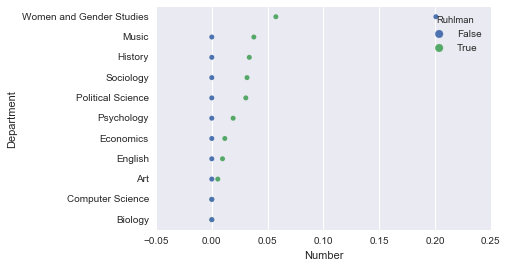

In [62]:
sns.stripplot(x = 'Number', y = 'Department', hue = 'Ruhlman', data = animal)

In [63]:
def construct_query_plotly(wordraw):
    english_stemmer = nltk.stem.SnowballStemmer('english')
    word = english_stemmer.stem(wordraw)
    if word in biodict.keys():
        bioresp = biodict[word] / biodict['total_words'] * 100
    else:
        bioresp = 0
    if word in biodictruhl.keys():
        bioruhl = biodictruhl[word] / biodictruhl['total_words'] * 100
    else:
        bioruhl = 0
        
    if word in engdict.keys():
        engresp = engdict[word] / engdict['total_words'] * 100
    else:
        engresp = 0
    if word in engdictruhl.keys():
        engruhl = engdictruhl[word] / engdictruhl['total_words'] * 100
    else:
        engruhl = 0
    
    if word in psychdict.keys():
        psychresp = psychdict[word] / psychdict['total_words'] * 100
    else:
        psychresp = 0
    if word in psychdictruhl.keys():
        psychruhl = psychdictruhl[word] / psychdictruhl['total_words'] * 100
    else:
        psychruhl = 0
        
    if word in artdict.keys():
        artresp = artdict[word] / artdict['total_words'] * 100
    else:
        artresp = 0
    if word in artdictruhl.keys():
        artruhl = artdictruhl[word] / artdictruhl['total_words'] * 100
    else:
        artruhl = 0
    
    if word in econdict.keys():
        econresp = econdict[word] / econdict['total_words'] * 100
    else:
        econresp = 0
    if word in econdictruhl.keys():
        econruhl = econdictruhl[word] / econdictruhl['total_words'] * 100
    else:
        econruhl = 0
        
    if word in socdict.keys():
        socresp = socdict[word] / socdict['total_words'] * 100
    else:
        socresp = 0
    if word in socdictruhl.keys():
        socruhl = socdictruhl[word] / socdictruhl['total_words'] * 100
    else:
        socruhl = 0
        
    if word in csdict.keys():
        csresp = csdict[word] / csdict['total_words'] * 100
    else:
        csresp = 0
    if word in csdictruhl.keys():
        csruhl = csdictruhl[word] / csdictruhl['total_words'] * 100
    else:
        csruhl = 0
        
    if word in womdict.keys():
        womresp = womdict[word] / womdict['total_words'] * 100
    else:
        womresp = 0
    if word in womdictruhl.keys():
        womruhl = womdictruhl[word] / womdictruhl['total_words'] * 100
    else:
        womruhl = 0
    
    if word in poldict.keys():
        polresp = poldict[word] / poldict['total_words'] * 100
    else:
        polresp = 0
    if word in poldictruhl.keys():
        polruhl = poldictruhl[word] / poldictruhl['total_words'] * 100
    else:
        polruhl = 0
        
    if word in musdict.keys():
        musresp = musdict[word] / musdict['total_words'] * 100
    else:
        musresp = 0
    if word in musdictruhl.keys():
        musruhl = musdictruhl[word] / musdictruhl['total_words'] * 100
    else:
        musruhl = 0
        
    if word in histdict.keys():
        histresp = histdict[word] / histdict['total_words'] * 100
    else:
        histresp = 0
    if word in histdictruhl.keys():
        histruhl = histdictruhl[word] / histdictruhl['total_words'] * 100
    else:
        histruhl = 0
        
    return pd.DataFrame({'Department': ['Biology','English', 'Psychology', 
                                       'Economics',  'Art', 'Sociology', 
                                       'Computer Science', 'Women and Gender Studies', 
                                       'Political Science', 
                                       'Music', 'History'], 
                        'Responses' : [bioresp,  engresp,  psychresp,  econresp, artresp,
                                    socresp,  csresp,  womresp,  polresp, musresp, 
                                    histresp],
                        'Ruhlman' : [ bioruhl, engruhl,  psychruhl, econruhl, 
                                   artruhl,  socruhl, csruhl,  womruhl,  polruhl, 
                                   musruhl, histruhl]}
                       )

In [76]:
animal = construct_query_plotly('animal')
animal.sort_values(['Responses','Ruhlman'], ascending = True, inplace = True)

In [77]:
animal

,Department,Responses,Ruhlman
3,Economics,0.000000,0.000000
5,Sociology,0.000000,0.000000
7,Women and Gender Studies,0.000000,0.000000
8,Political Science,0.000000,0.000000
9,Music,0.000000,0.000000
10,History,0.000000,0.000000
4,Art,0.000000,0.026866
2,Psychology,0.000000,0.035035
1,English,0.000000,0.038410
6,Computer Science,0.000000,0.105810


In [65]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
tls.set_credentials_file(username='hannah.murphy', api_key='nuq4spjk38')

trace0 = go.Scatter(
    x=animal['Responses'],
    y=animal['Department'],
    mode='markers',
    name='Responses',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=animal['Ruhlman'],
    y=animal['Department'],
    mode='markers',
    name='Ruhlman',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
data = [trace0, trace1]
layout = go.Layout(
    title="Word Frequency based on Responses and Ruhlman Abstracts",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        autotick=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=200,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='rgb(238,232,170)',
    plot_bgcolor='rgb(255,255,240)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='lowest-oecd-votes-cast')

In [75]:
english_stemmer = nltk.stem.SnowballStemmer('english')
word = english_stemmer.stem('experiment')

womresp = womdict[word] / womdict['total_words'] * 100

print(womresp)
print(word)

0.4016064257028112
experi
